## Файл с анализом данных
В данном файле рассматривается распределение целевой метрики и построение облаков слов

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud

In [2]:
# Загрузка отчищенных данных
with open('./files/Cleaned_Data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)


In [3]:
df = pd.DataFrame(loaded_data)

<Axes: >

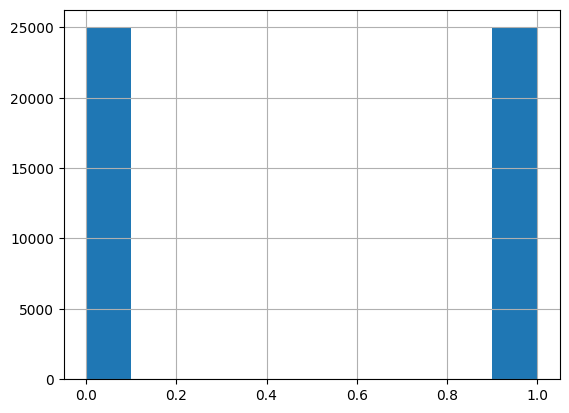

In [4]:
df.iloc[:,1].hist()

Как мы можем заметить у нас отсутствует несбалансированность классов, т.е. и положительных, и отрицательных отзывов в нашем случае поровну.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


Всего в нашей выборки 50000 объектов.  
Пропущенных данных нет

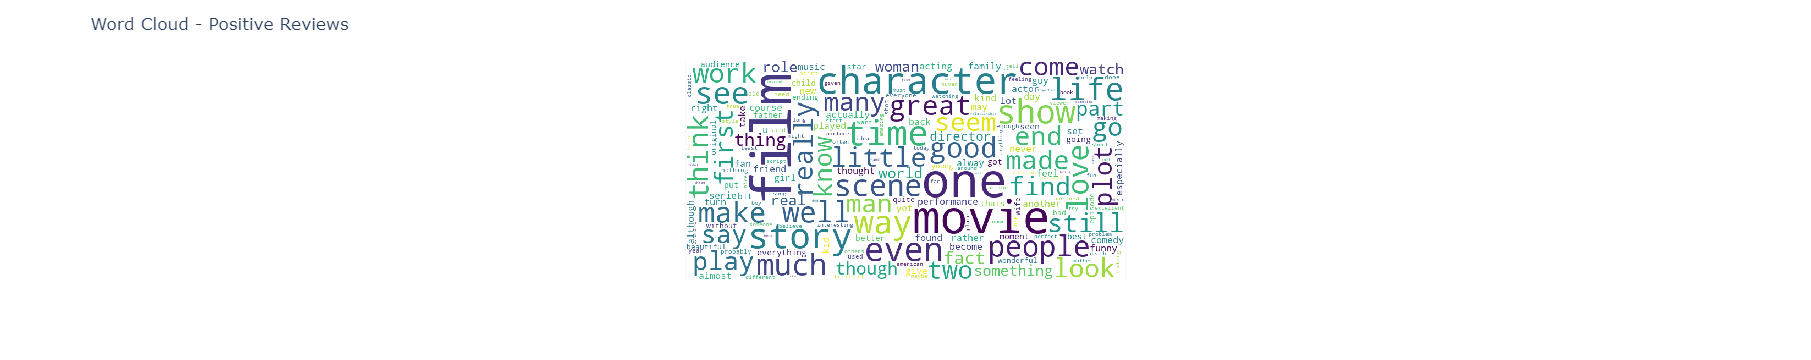

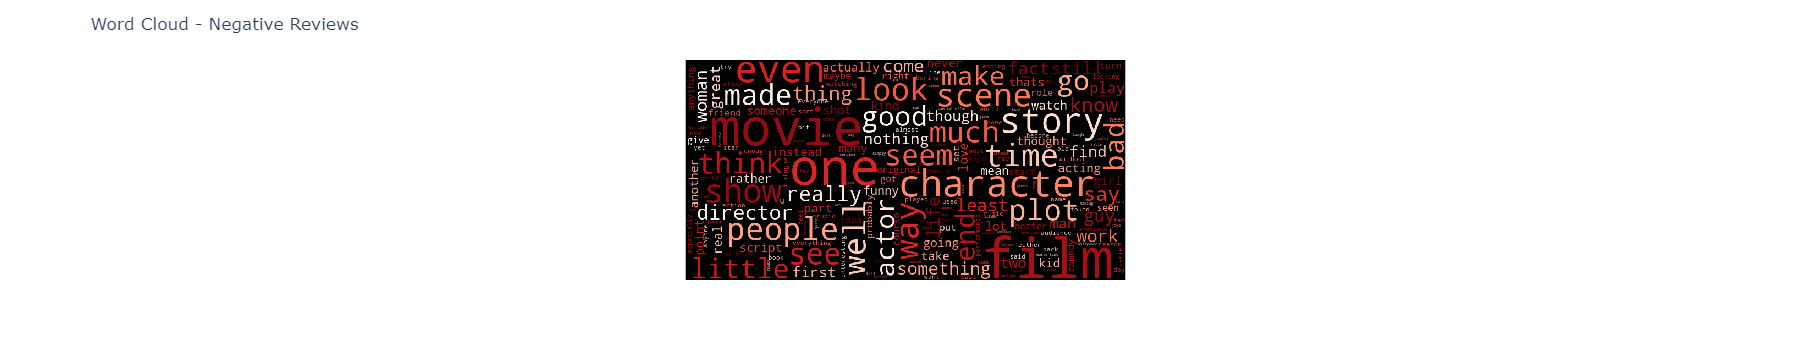

In [6]:
positive_reviews = ' '.join(df[df['sentiment'] == 1]['review'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(positive_reviews)
fig = px.imshow(wordcloud.to_array())
fig.update_layout(title='Word Cloud - Positive Reviews', xaxis=dict(visible=False), yaxis=dict(visible=False))
fig.show()

negative_reviews = ' '.join(df[df['sentiment'] == 0]['review'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='black', colormap='Reds').generate(negative_reviews)
fig = px.imshow(wordcloud.to_array())
fig.update_layout(title='Word Cloud - Negative Reviews', xaxis=dict(visible=False), yaxis=dict(visible=False))
fig.show()

Мы построили облака слов для позитивных и негативных отзывов, как мы можем заметить некоторые слова часто встречаются и в тех и в других отзывах  